## Student Performance Indicator
#### Life cycle of Machine learning Project
Data Collection,
Data Checks to perform,
Exploratory data analysis,
 Data Pre-Processing,
 Model Training,
 Choose best model.

 

 ### 1) Problem statement
 This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977,
    The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('stud.csv')

In [3]:
#top 5
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
#shape of the dataset
df.shape

(1000, 8)

### 2.2 Dataset information
gender : sex of students  -> (Male/female),
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E),
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school),
lunch : having lunch before test (standard or free/reduced),
test preparation course : complete or not complete before test,
math score,
reading score,
writing score

### 3. Data Checks to perform
Check Missing values,
Check Duplicates,
Check data type,
Check the number of unique values of each column,
Check statistics of data set,
Check various categories present in the different categorical column

In [5]:
#checking missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
#checking duplicates
df.duplicated().sum()

0

In [7]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
#checking number of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
#check statistics of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Exploring Data

In [10]:
print("Categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())
print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' variable:  ",end=" ")
print(df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable:  ",end=" ")
print(df['lunch'].unique())
print("Categories in 'test_preparation_course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:   ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:   ['none' 'completed']


In [12]:
#define numerical & categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

#print columns
print('we have {} numerical features : {}'.format(len(numeric_features),numeric_features))
print('we have {} categorical features : {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for "Total Score" and "Average"

In [13]:
df['total_score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [14]:
reading_full=df[df['reading_score']==100]['average'].count()
writing_full=df[df['writing_score']==100]['average'].count()
math_full=df[df['math_score']==100]['average'].count()
print(f'Number of Students with full marks in maths : {math_full}')
print(f'Number of Students with full marks in writing : {writing_full}')
print(f'Number of Students with full marks in reading : {reading_full}')

Number of Students with full marks in maths : 7
Number of Students with full marks in writing : 14
Number of Students with full marks in reading : 17


In [15]:
reading_less_20=df[df['reading_score']<=20]['average'].count()
writing_less_20=df[df['writing_score']<=20]['average'].count()
math_less_20=df[df['math_score']<=20]['average'].count()
print(f'Number of Students with less than 20  marks in maths : {math_less_20}')
print(f'Number of Students with less than 20  marks in writing : {writing_less_20}')
print(f'Number of Students with less than 20  marks in reading : {reading_less_20}')

Number of Students with less than 20  marks in maths : 4
Number of Students with less than 20  marks in writing : 3
Number of Students with less than 20  marks in reading : 1


### Histrogram & KDE


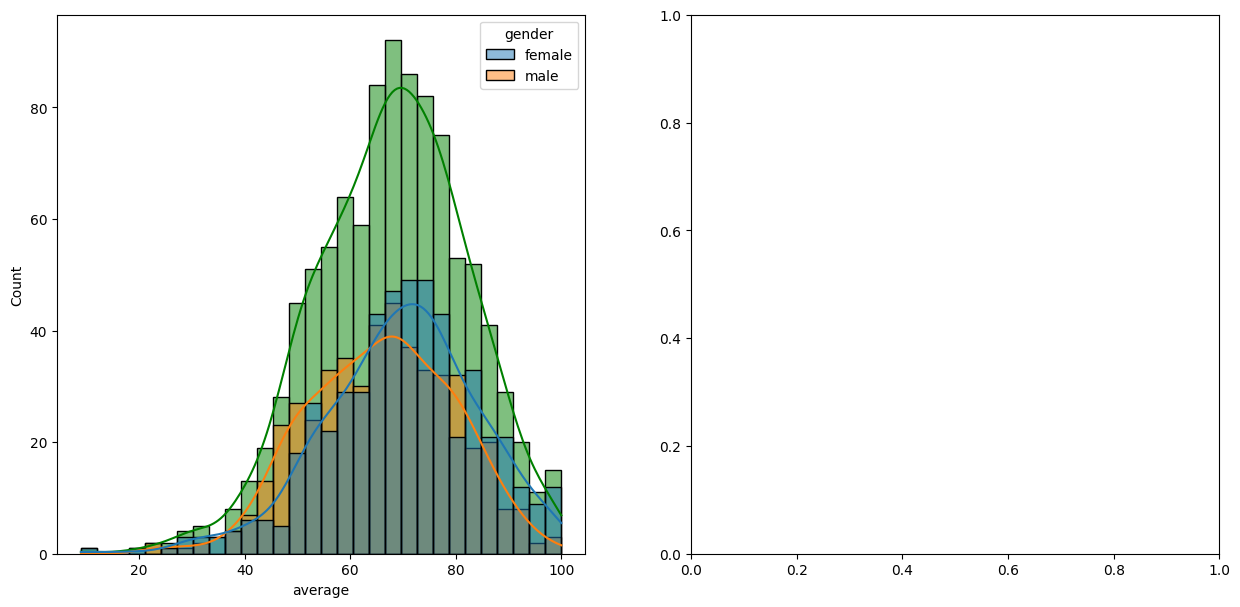

In [20]:
#KDE meand kernel density estimate
fig, axs=plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')
plt.show()


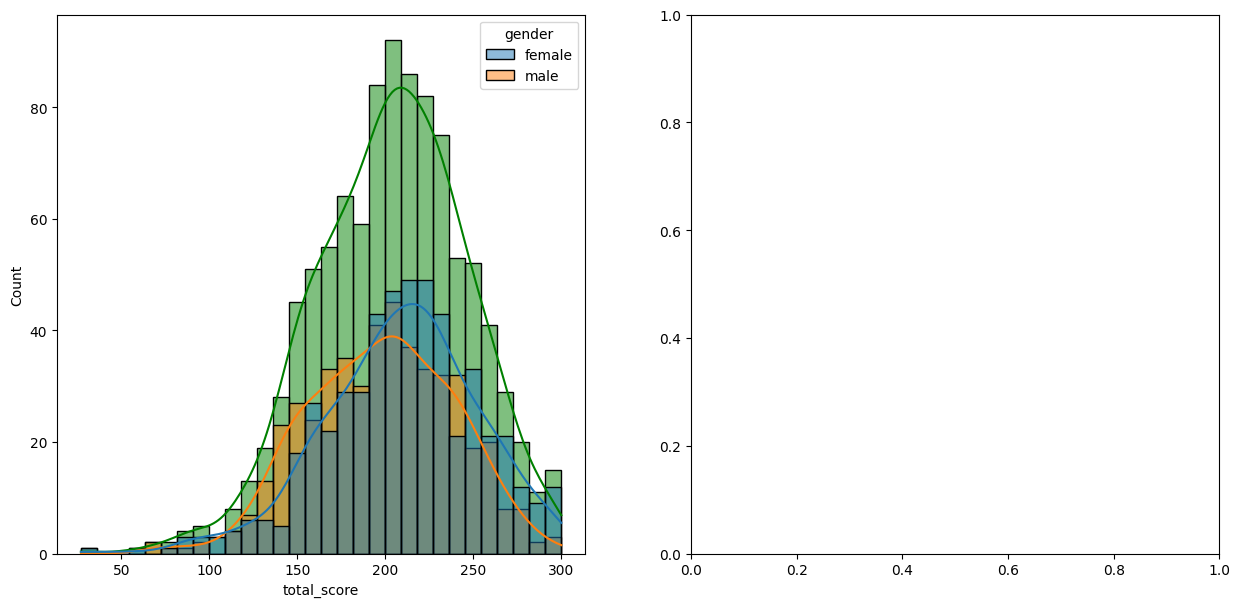

In [21]:
fig, axs=plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,hue='gender')
plt.show()
